In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
import numpy as np
from utils.Dataset import get_xray_dataloader
from utils.Transforms import ConvertToHeatmaps, ContrastAdjustment, Normalize
import time
import torch

In [6]:
import pickle
cross_training_set = {
    "images":[".\\images_cropped\\train\\"+str(id)+".jpg" for id in range(105)],
    "landmarks":[".\\landmarks_cropped\\train\\"+str(id)+".txt" for id in range(105)],
    "labels":[".\\labels\\train\\"+str(id)+".npy" for id in range(105)]
}
cross_testing_set = {
    "images":[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(70)],
    "landmarks":[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(70)],
    "labels":[".\\labels\\test\\"+str(id)+".npy" for id in range(70)]
}

unseen_testing_set = {
    "images":[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(70, 105)],
    "landmarks":[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(70, 105)],
    "labels":[".\\labels\\test\\"+str(id)+".npy" for id in range(70, 105)]
}
cross_validation_set_1 = {"trainingset":cross_training_set, "testingset":cross_testing_set, "unseenset":unseen_testing_set}

pickle.dump(cross_validation_set_1, open("cross_validation_set.pt", "wb"))

In [2]:

cross_training_set_1 = {
    "images":[".\\images_cropped\\train\\"+str(id)+".jpg" for id in range(35)]+[".\\images_cropped\\train\\"+str(id)+".jpg" for id in range(105, 700)],
    "landmarks":[".\\landmarks_cropped\\train\\"+str(id)+".txt" for id in range(35)]+[".\\landmarks_cropped\\train\\"+str(id)+".txt" for id in range(105, 700)],
    "labels":[".\\labels\\train\\"+str(id)+".npy" for id in range(35)]+[".\\labels\\train\\"+str(id)+".npy" for id in range(105, 700)]
}

cross_training_set_2 = {
    "images":[".\\images_cropped\\train\\"+str(id)+".jpg" for id in range(35, 70)]+[".\\images_cropped\\train\\"+str(id)+".jpg" for id in range(700, 1295)],
    "landmarks":[".\\landmarks_cropped\\train\\"+str(id)+".txt" for id in range(35, 70)]+[".\\landmarks_cropped\\train\\"+str(id)+".txt" for id in range(700, 1295)],
    "labels":[".\\labels\\train\\"+str(id)+".npy" for id in range(35, 70)]+[".\\labels\\train\\"+str(id)+".npy" for id in range(700, 1295)]
}

cross_training_set_3 = {
    "images":[".\\images_cropped\\train\\"+str(id)+".jpg" for id in range(70, 105)]+[".\\images_cropped\\train\\"+str(id)+".jpg" for id in range(1295, 1890)],
    "landmarks":[".\\landmarks_cropped\\train\\"+str(id)+".txt" for id in range(70, 105)]+[".\\landmarks_cropped\\train\\"+str(id)+".txt" for id in range(1295, 1890)],
    "labels":[".\\labels\\train\\"+str(id)+".npy" for id in range(70, 105)]+[".\\labels\\train\\"+str(id)+".npy" for id in range(1295, 1890)]
}

cross_testing_set_1 = {
    "images":[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(23)]+[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(105, 289)],
    "landmarks":[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(23)]+[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(105, 289)],
    "labels":[".\\labels\\test\\"+str(id)+".npy" for id in range(23)]+[".\\labels\\test\\"+str(id)+".npy" for id in range(105, 289)]
}

cross_testing_set_2 = {
    "images":[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(23, 46)]+[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(289, 473)],
    "landmarks":[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(23, 46)]+[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(289, 473)],
    "labels":[".\\labels\\test\\"+str(id)+".npy" for id in range(23, 46)]+[".\\labels\\test\\"+str(id)+".npy" for id in range(289, 473)]
}

cross_testing_set_3 = {
    "images":[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(46, 70)]+[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(473, 665)],
    "landmarks":[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(46, 70)]+[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(473, 665)],
    "labels":[".\\labels\\test\\"+str(id)+".npy" for id in range(46, 70)]+[".\\labels\\test\\"+str(id)+".npy" for id in range(473, 665)]
}


unseen_testing_set = {
    "images":[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(70, 105)]+[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(665, 945)],
    "landmarks":[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(70, 105)]+[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(665, 945)],
    "labels":[".\\labels\\test\\"+str(id)+".npy" for id in range(70, 105)]+[".\\labels\\test\\"+str(id)+".npy" for id in range(665, 945)]
}
cross_validation_set_1 = {"trainingset":cross_training_set_1, "testingset":cross_testing_set_1, "unseenset":unseen_testing_set}
cross_validation_set_2 = {"trainingset":cross_training_set_2, "testingset":cross_testing_set_2, "unseenset":unseen_testing_set}
cross_validation_set_3 = {"trainingset":cross_training_set_3, "testingset":cross_testing_set_3, "unseenset":unseen_testing_set}

import pickle
pickle.dump(cross_validation_set_1, open("cross_validation_set_1.pt", "wb"))
pickle.dump(cross_validation_set_2, open("cross_validation_set_2.pt", "wb"))
pickle.dump(cross_validation_set_3, open("cross_validation_set_3.pt", "wb"))


In [3]:
def plot_image(img, landmarks):
    plt.imshow(img, cmap="gray")
    plt.scatter(landmarks[:,0], landmarks[:,1], s=0.5)
    plt.show()

272


<IPython.core.display.Javascript object>


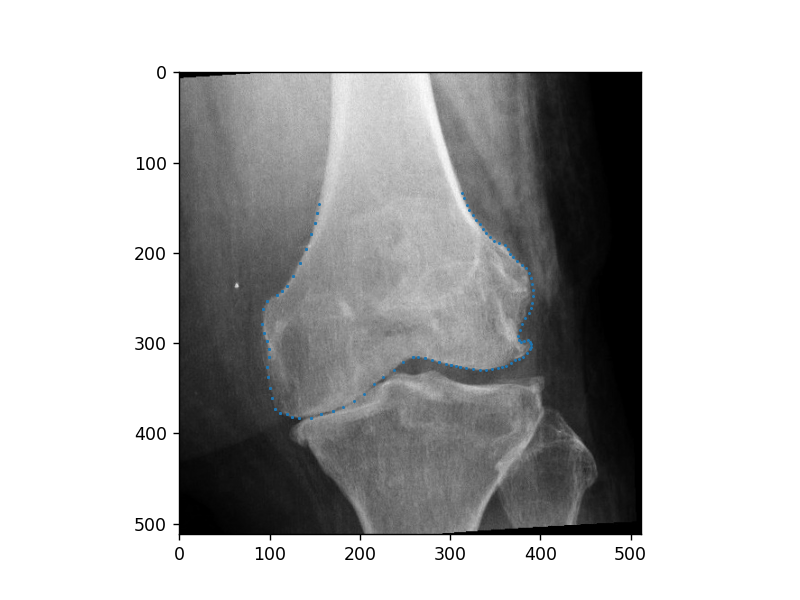

In [4]:
mode = cv2.IMREAD_GRAYSCALE
index = np.random.randint(0, 1890)
print(index)
plot_image(cv2.imread(".\\images_cropped\\train\\"+str(index)+".jpg", mode), np.loadtxt(".\\landmarks_cropped\\train\\"+str(index)+".txt"))

time taken is 0.06582498550415039
torch.Size([1, 512, 512]) torch.Size([65, 2]) torch.Size([1, 65, 512, 512])
tensor(1.0000, dtype=torch.float64) tensor(-1.0000, dtype=torch.float64)


<IPython.core.display.Javascript object>


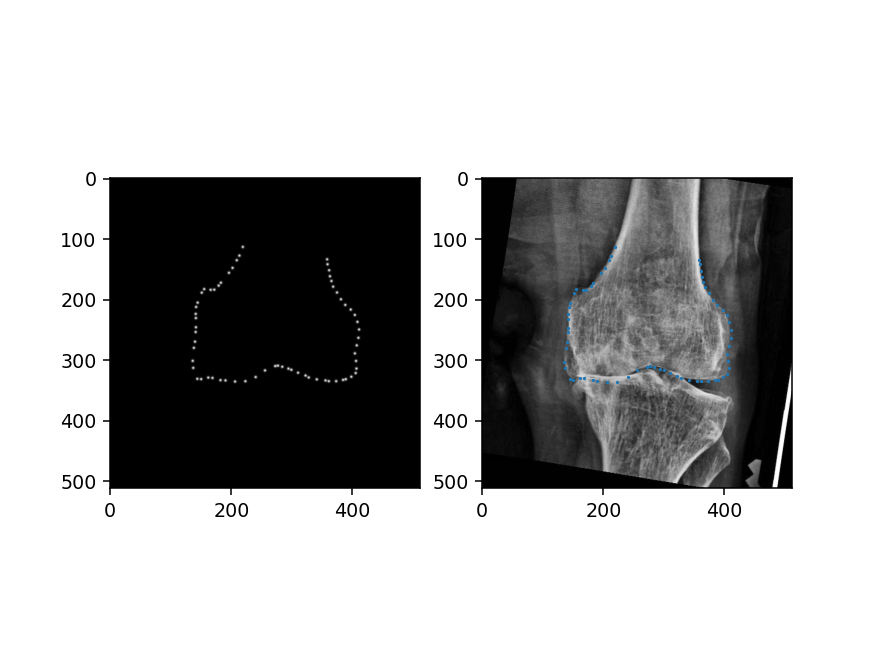

In [3]:
is_cuda = torch.cuda.is_available()
dataloader = get_xray_dataloader(open(".\\datasources\\cross_validation_set_1.pt", "rb"), transforms=[ContrastAdjustment(), Normalize()])
heatmapsconvertor = ConvertToHeatmaps()
sample = next(iter(dataloader["trainloader"]))

image, landmarks = sample["image"], sample["landmarks"]

#if is_cuda:
    #image, landmarks = image.cuda(), landmarks.cuda()

sigmas = [1.5]*landmarks.shape[1]

start_time = time.time()
heatmaps = heatmapsconvertor(landmarks, sigmas)
end_time = time.time()
print("time taken is "+str(end_time-start_time))
print(image.shape, landmarks.shape, heatmaps.shape)
print(image.max(), image.min())

image, landmarks, heatmaps = image.cpu().squeeze_().numpy(), landmarks.cpu().numpy(), heatmaps.squeeze_().cpu().numpy() 


heatmap = np.zeros(heatmaps.shape[1:])
for h in range(heatmaps.shape[0]):
    heatmap += heatmaps[h]
#print(heatmap.shape)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(heatmap, "gray")
#ax1.scatter(landmarks[:, 0], landmarks[:,1], s=0.5)
ax2.imshow(image, "gray")
ax2.scatter(landmarks[:, 0], landmarks[:,1], s=0.5)
plt.show()


In [ ]:
dataloader = get_xray_dataloader(open(".\\datasources\\cross_validation_set_1.pt", "rb"), transforms=[ContrastAdjustment(), Normalize()])
sigmas = [1.5]*65
heatmapsconvertor = ConvertToHeatmaps()
start_time = time.time()
batch = 0
for batch_idx, sample in enumerate(dataloader["trainloader"]):
    image, heatmaps = sample["image"], heatmapsconvertor(sample["landmarks"], sigmas)
    if is_cuda:
        image, heatmaps = image.cuda(), heatmaps.cuda()
    batch += 1
for batch_idx, sample in enumerate(dataloader["validloader"]):
    image, heatmaps = sample["image"], heatmapsconvertor(sample["landmarks"], sigmas)
    if is_cuda:
        image, heatmaps = image.cuda(), heatmaps.cuda()
    batch += 1
end_time = time.time()
print("time took to 1 epoch is "+str(end_time-start_time), batch)